In [1]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt
import matplotlib.pyplot as plt

/Users/ryunagai/.pyenv/versions/3.6.5/envs/main_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Photon number preservation with BS

In [7]:
eng, q = sf.Engine(2)
with eng:
    Fock(2)  | q[0]
    Fock(3)  | q[1]
    
    BSgate() | (q[0], q[1])
    Measure  | q[0]
    
eng.run("fock", cutoff_dim=6, reset_backend=False)

eng.reset_queue()  # resets the command queue
with eng:
    Measure | q[1]

state = eng.run("fock", cutoff_dim=6, reset_backend=False)

n_ = q[0].val
m_ = q[1].val
print(n_, ' + ', m_, ' = ', n_ + m_)

5  +  0  =  5


# HOM Interferometer

In [1]:
import strawberryfields as sf
from strawberryfields.ops import *


eng, q = sf.Engine(2)
with eng:
    Fock(1)  | q[0]
    Fock(1)  | q[1]

    BSgate() | (q[0], q[1])
    Measure  | q[0]
    Measure  | q[1]

state = eng.run("fock", cutoff_dim=6)
n_ = q[0].val
m_ = q[1].val

print("Output1 photon number: ", n_)
print("Output2 photon number : ", m_)


/Users/ryunagai/.pyenv/versions/3.6.5/envs/main_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Output1 photon number:  2
Output2 photon number :  0


In [2]:
import strawberryfields as sf
from strawberryfields.ops import *

case1 = 0
case2 = 0

for i in range(1000):
    eng, q = sf.Engine(2)
    with eng:
        Fock(1)  | q[0]
        Fock(1)  | q[1]

        BSgate() | (q[0], q[1])
        Measure  | q[0]
        Measure  | q[1]

    state = eng.run("fock", cutoff_dim=6)
    n_ = q[0].val
    m_ = q[1].val
    if n_ == 2:
        case1 += 1
    elif m_ == 2:
        case2 += 1
    #print(n_, ' + ', m_, ' = ', n_ + m_)
    
print('The case that...')
print('mode 1 has 2 photon : ', case1)
print('mode 2 has 2 photon : ', case2)
    
print('Sum : ', case1 + case2)

The case that...
mode 1 has 2 photon :  485
mode 2 has 2 photon :  515
Sum :  1000


# Post selection

## With Fock State

In [89]:
eng, q = sf.Engine(2)
with eng:
    Fock(2) | q[0]
    Fock(3) | q[1]
    BSgate() | (q[0], q[1])
    MeasureFock(select=0) | q[0] # select the 0 photon state
    Measure  | q[1]

eng.run("fock", cutoff_dim=6)
state = eng.run("fock", cutoff_dim=6, reset_backend=False)

n_ = q[0].val
m_ = q[1].val
print(n_, ' + ', m_, ' = ', n_ + m_)

0  +  5  =  5


## With 2-modes Squeezing state

In [1]:
eng, q = sf.Engine(3)
S_parameter = (1 + 1j) / sqrt(2)
with eng:
    Sgate(S_parameter) | q[2]
    S2gate(S_parameter) | (q[0], q[1]) # var is squeezing parameter r
    MeasureHomodyne(0,select=1)  | q[0] # Position based measurement
    # select : desired values of measurement result

state = eng.run('gaussian')
mu, cov = state.reduced_gaussian([1])
print('mu =', mu[0])
print('Relational position should be preserved')

x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)
W = state.wigner(1, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)


NameError: name 'sf' is not defined

2-mode squeezing と 1-mode squeezing の挙動の違いはあまり理解していない...

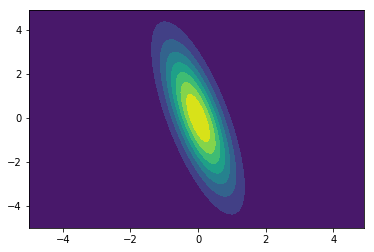

In [156]:
x1 = np.arange(-5, 5, 0.1)
p1 = np.arange(-5, 5, 0.1)
W2 = state.wigner(2, x1, p1)
X1, P1 = np.meshgrid(x1, p1)
plt.contourf(X1, P1, W2)